In [337]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List
from numba import jitclass, boolean, float64, njit
import warnings

In [383]:
arr = np.array

spec = [
    ('grad', boolean),
    ('alpha', float64),
    ('weights', float64[:]),
    ('bias', float64)
]


class LinearReg(object):
    def __init__(self, grad:boolean=False):
        self.grad = grad
        
    def fit(self, X: arr, y: arr, iterations: int = 1000000) -> None:
        self.weights = np.random.randn(X.shape[1])
        self.bias = np.random.rand()
        if self.grad:
            self.weights, self.bias = fit_grad(X, y, weights = self.weights, bias = self.bias, iterations = iterations)
        else:
            if iterations != 1000000:
                warnings.warn("Iterations argument not used when fitting ols")
            self.weights, self.bias = fit_ols(X, y)
        
    def predict(self, X: arr) -> arr:
        if self.grad:
            return np.dot(X, self.weights) + self.bias
        else:
            return np.dot(X, self.weights)
        
    def fit_predict(self, X, y, grad:boolean=False):
        self.fit(X,y)
        return self.predict(X)
    
    def score(self, X: arr, y: arr) -> np.float:
        y_pred = self.predict(X)
        u = (((y - y_pred) ** 2)).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - (u/v)

@njit
def fit_grad(
    X: arr, 
    y: arr, 
    weights: arr, 
    bias:arr, 
    iterations: int = 1000000, 
    alpha: np.float64 = 0.01
) -> Tuple[arr, np.float64]:
    # optimization loop
    for iteration in range(iterations):
        # forward pass
        y_hat = np.dot(X, weights) + bias

        # compute the MSE loss
        cost = ((y-y_hat)**2).mean()

        # optimization step

        # compute gradients
        b_hat_d = -2 * (y-y_hat).mean()
        W_hat_d = -2 * np.dot((y-y_hat), X)  / y.shape[0]

        # update weights with gradients
        weights -= W_hat_d * alpha
        bias -= b_hat_d * alpha
        
        
    return weights, bias
        
@njit
def fit_ols(X: arr, y: arr) -> Tuple[arr, np.float64]:
    weights = np.linalg.lstsq(X, y, rcond=-1)[0]
    bias = y.mean()
    return weights, bias

In [384]:
# test it

import pandas as pd
data = pd.read_csv('housingdata.csv', header=None)
data.columns = [str(i) for i in data.columns]

data = data.apply(lambda x: (x - x.mean())/x.std(), axis=1)

data = data.sample(frac=1).reset_index(drop=True)

train = data.loc[:int(data.shape[0]*0.7)]
test = data.loc[int(data.shape[0]*0.7):]

X_train, y_train = train.drop("13", axis=1), train["13"]
X_test, y_test = test.drop("13", axis=1), test["13"]

reg = LinearReg()

In [385]:
reg.fit(X_train.values, y_train.values)

In [386]:
reg.score(X_train.values, y_train.values)

1.0

In [387]:
reg.score(X_test.values, y_test.values)

1.0

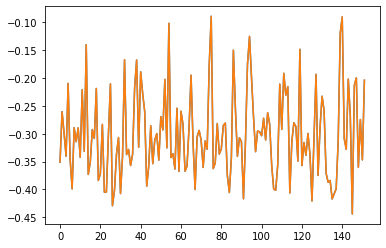

In [388]:
plt.plot(reg.predict(X_test.values))
plt.plot(y_test.values)